In [1]:
import pandas as pd
import numpy as np
from utils import adstock, s_curve, create_transformed_tables, plot_stacked_area_with_actual, plot_transformed_vs_raw, plot_data_set
import pandas as pd

In [2]:
df_data= pd.read_csv('Data/df_data.csv', index_col=0, parse_dates=True)

In [3]:
# Create a new DataFrame with specified columns and data types
df_var_spec = pd.DataFrame({
    'variable': pd.Series(dtype='str'),
    'beta': pd.Series(dtype='float'),
    'carryover': pd.Series(dtype='float'),
    'saturation': pd.Series(dtype='float'),
    'inflection': pd.Series(dtype='float'),
    'height': pd.Series(dtype='float'),
    'normalize': pd.Series(dtype='bool')
})
df_var_spec

,variable,beta,carryover,saturation,inflection,height,normalize


$$
  x' = \frac{x - \mu}{x_{\text{max}} - x_{\text{min}}}
$$


In [ ]:
# Clear all rows in df_var_spec before adding new rows
df_var_spec = df_var_spec.iloc[0:0]

# Explicitly add each column of df_data as a row in df_var_spec, with 'normalize' field set to True
df_var_spec = pd.concat([
    df_var_spec,
    pd.DataFrame([{'variable': 'c', 'beta': 100, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': False}]),
    pd.DataFrame([{'variable': 'cyclical_var', 'beta': 1, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'price', 'beta': -1, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'distribution', 'beta': 1, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'media1', 'beta': 1, 'carryover': 0.5, 'saturation': 160, 'inflection': 0.87, 'height': 1.55, 'normalize': True}]),
    pd.DataFrame([{'variable': 'media2', 'beta': 1, 'carryover': 0.7, 'saturation': 500, 'inflection': 1.96, 'height': 2.75, 'normalize': True}]),
    pd.DataFrame([{'variable': 'media3', 'beta': 1, 'carryover': 0.2, 'saturation': 15, 'inflection': 1.2, 'height': 1, 'normalize': True}]),
    pd.DataFrame([{'variable': 'error', 'beta': 0.5, 'carryover': None, 'saturation': None, 'inflection': None, 'height': 1, 'normalize': False}])
], ignore_index=True)

df_var_spec

C:\Users\User\AppData\Local\Temp\ipykernel_43280\2258709955.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_var_spec = pd.concat([


,variable,beta,carryover,saturation,inflection,height,normalize
0,c,100.0,NaN,None,NaN,NaN,False
1,cyclical_var,1.0,NaN,None,NaN,NaN,True
2,price,-0.5,NaN,None,NaN,NaN,True
3,distribution,1.0,NaN,None,NaN,NaN,True
4,media1,1.0,0.5,160,0.87,1.55,True
5,media2,1.0,0.7,500,1.96,2.75,True
6,media3,1.0,0.2,15,1.20,1.00,True
7,error,0.5,NaN,None,NaN,1.00,False


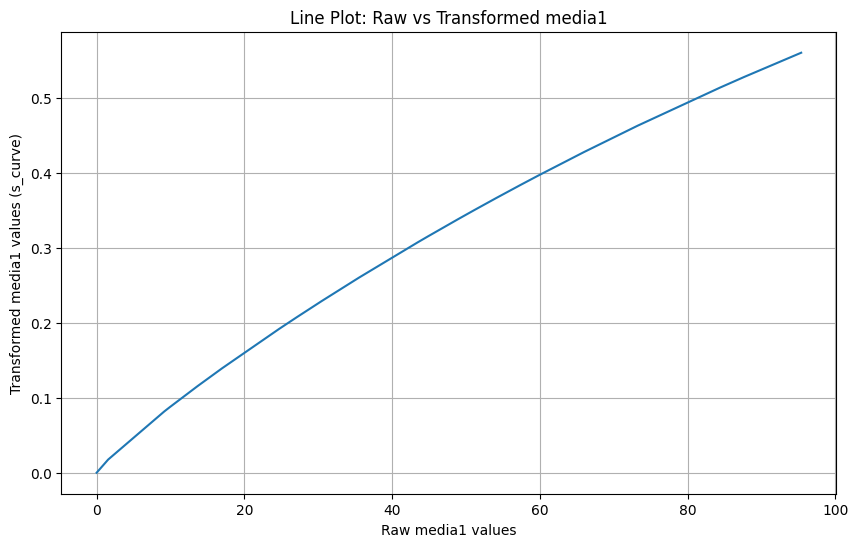

In [5]:
# Apply s_curve transformation to media1
media1_transformed = s_curve(df_data['media1'].values, saturation=160, inflection=0.87, height=1.55)

# Plot using the function
plot_transformed_vs_raw(df_data['media1'].values, media1_transformed, xlabel='Raw media1 values', ylabel='Transformed media1 values (s_curve)', title='Line Plot: Raw vs Transformed media1')

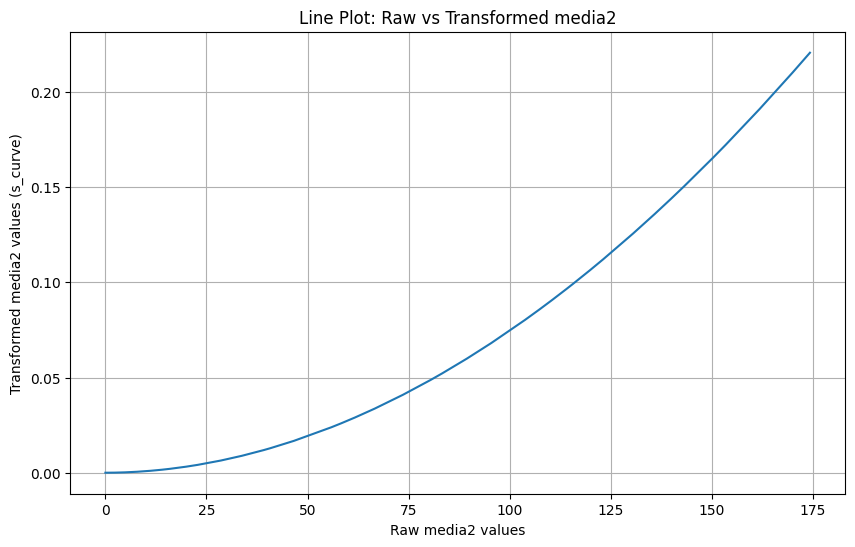

In [6]:
var = 'media2';
spec = df_var_spec.loc[df_var_spec['variable'] == var].iloc[0].to_dict()

# Now you can access values like spec['carryover'], spec['saturation'], etc.
carryover = spec['carryover']
sat = spec['saturation']
inf = spec['inflection']
height = spec['height']

# adstock = pd.Series(adstock(df_data[var].values, carryover), index=df_data.index)
var_adstock = adstock(df_data[var].values, carryover)


# Apply s_curve transformation using parameters from var spec
var_s_curve = s_curve(var_adstock, saturation=sat, inflection=inf, height=height)

# Plot using the function
plot_transformed_vs_raw(var_adstock, var_s_curve, xlabel='Raw media2 values', ylabel='Transformed media2 values (s_curve)', title='Line Plot: Raw vs Transformed media2')


In [7]:
# Example usage:
df_trans,df_trans_norm,df_values = create_transformed_tables(df_data, df_var_spec)
df_values.head()

,c,cyclical_var,price,distribution,media1,media2,media3,error,actual
2022-01-01,100.0,-5.693451e-18,0.041667,-0.5,0.337644,-0.109462,-0.181321,-0.155614,99.432913
2022-01-08,100.0,6.026834e-02,0.041667,-0.5,0.530650,-0.109462,-0.181321,0.093157,99.934958
2022-01-15,100.0,1.196578e-01,0.041667,-0.5,0.687871,-0.109462,-0.181321,-0.520802,99.537610
2022-01-22,100.0,1.773024e-01,0.041667,-0.5,0.699281,-0.109462,-0.181321,0.504325,100.631792
2022-01-29,100.0,2.323616e-01,0.041667,-0.5,0.431007,-0.109462,-0.181321,-0.159043,99.755209


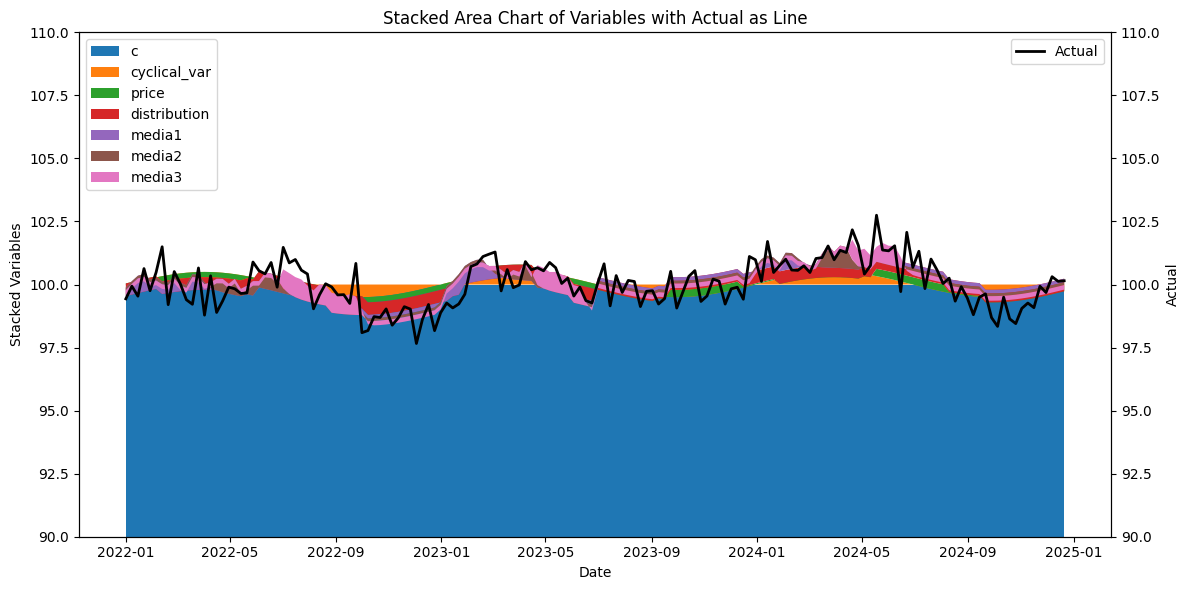

In [8]:
plot_stacked_area_with_actual(df_values, y_axis_min=90, y_axis_max=110)

In [9]:
import os

# Ensure Data folder exists
os.makedirs('Data', exist_ok=True)

# Save dataframes as CSV
if 'df_data' in globals():
    df_data.to_csv('Data/df_data.csv')
if 'df_trans' in globals():
    df_trans.to_csv('Data/df_trans.csv')
if 'df_trans_norm' in globals():
    df_trans_norm.to_csv('Data/df_trans_norm.csv')
if 'df_values' in globals():
    df_values.to_csv('Data/df_values.csv')
if 'df_var_spec' in globals():
    df_var_spec.to_csv('Data/df_var_spec.csv')